# Remon Isaac Gamil Isaac - Data Science and Business Analytics intern 

## Task 6: Prediction using Decision Tree Algorithm
    1- Analyze the data and visualize it
    2- Create a model to accurately predict the output of the features.


### Analyzing the data

In [1]:
#importing some important libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\Remon\Desktop\Work\TSF\Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Basic info on our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Apparently we have 4 independent features and 1 dependent feature which is "Species"

In [5]:
#understanding the statistical analysis of our featuers.
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# dropping the 'Id' column since it contributes nothing to our analysis or model training. (not a feature)

df = df.drop('Id', axis = 1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#Since there is one feature that is dependent which is "Species". We will try to predict the value of this feature "Species"
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Visualizing our data

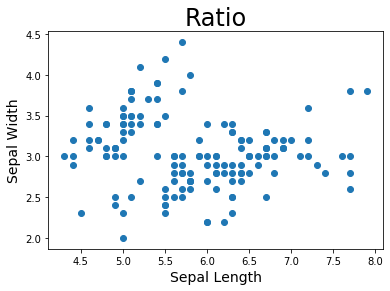

In [8]:
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'])
plt.title('Ratio', fontsize=24)
plt.xlabel('Sepal Length',fontsize=14)
plt.ylabel('Sepal Width',fontsize=14)
plt.show()

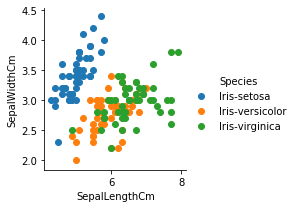

In [9]:
s = sns.FacetGrid(df, hue = 'Species') 
s.map_dataframe(plt.scatter, 'SepalLengthCm', 'SepalWidthCm')
s.add_legend()

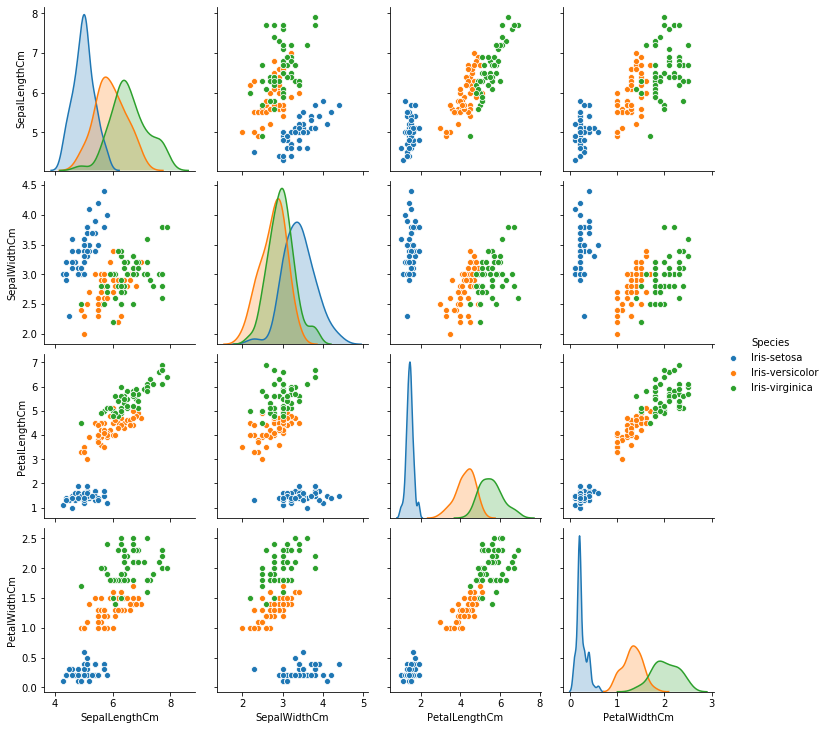

In [10]:
sns.pairplot(df, hue = 'Species')
plt.show()

### Making our decision tree classifier model.

In [23]:
#importing some important libraries

from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

# Here we separating independent varibles or target varibles from Iris dataset
X = df[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

In [26]:
#Dividing our data into training, testing, and validation sets. This helps prevent our model from overfitting to the test data. 

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.3, random_state = 73)

Xt, Xcv, Yt, Ycv = train_test_split(Xtrain, Ytrain, test_size = 0.1, random_state = 73)

In [27]:
#Creating and fitting our classifier to the training set. 
clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(Xt, Yt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
print('Accuracy score is:',cross_val_score(clf, Xt, Yt, cv = 3, scoring = 'accuracy').mean())

Accuracy score is: 0.9469086021505376


In [29]:
#Computing our validation accuracy.
Y_pred = clf.predict(Xcv)
print('Accuracy score for validation test data is:', accuracy_score(Ycv, Y_pred))
multilabel_confusion_matrix(Ycv , Y_pred)

Accuracy score for validation test data is: 0.9090909090909091


array([[[6, 0],
        [0, 5]],

       [[8, 1],
        [0, 2]],

       [[7, 0],
        [1, 3]]], dtype=int64)

In [30]:
#actually testing our model on new test data. 
Yt_pred = clf.predict(Xtest)
print('Model Accuracy Score on unseen data(Xtest) is:',accuracy_score(Ytest, Yt_pred))
multilabel_confusion_matrix(Ytest , Yt_pred)

Model Accuracy Score on unseen data(Xtest) is: 0.9777777777777777


array([[[30,  0],
        [ 0, 15]],

       [[30,  0],
        [ 1, 14]],

       [[29,  1],
        [ 0, 15]]], dtype=int64)

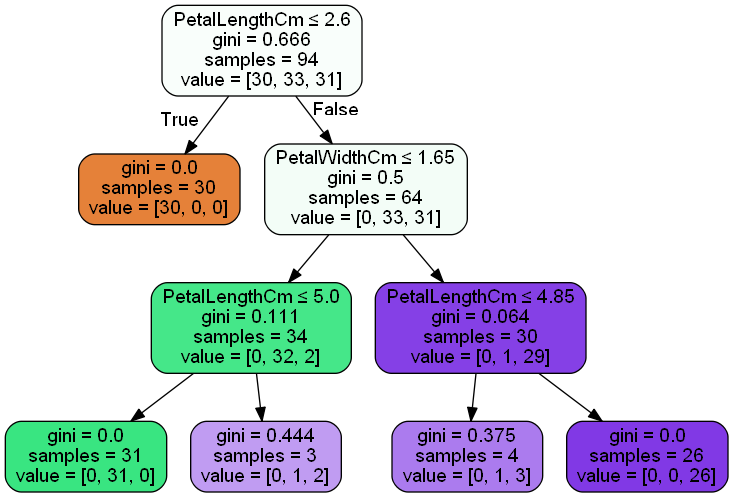

In [31]:
#Visualizing our decision tree. 

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names= df.columns.drop('Species'),  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Classification report

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.93      0.97        15
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



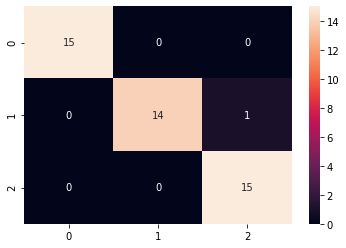

In [32]:
print(classification_report(Ytest , Yt_pred))
sns.heatmap(confusion_matrix(Ytest , Yt_pred),annot = True)

In [33]:
accuracy_score(Ytest , Yt_pred)

0.9777777777777777

The model is peforming at a 98% accuracy which is pretty accurate. We can deploy the model.